# Convergence analysis - sensor protein system

Convergence analysis of a silver spherical sensor of radius 8 nm with a Bovine Serum Albumina (BSA) protein located at 1 nm of distance in the `z` direction. 

We selected a constant density of 2 triangles per Angstrom square for the protein mesh, while varying the density of the spherical sensor (512, 2048, 8192, 32768 elements). We computed the order of convergence and Richardson extarpolation using the 3 finest meshes, and calculated the respective relative errors. Finally, we analyze the relative errors for differente tolerances and protein meshes to relax the parameters to perform the simulations. 

We did this analysis for a wavelength of 380 nm.

In [1]:
import numpy
import pickle
import convergence_helper 
from matplotlib import pyplot, rcParams
%matplotlib inline

In [2]:
#reading data 
pickle_list = ['512', '2K', '8K', '32K']
Cext_sensor = list()
for mesh in pickle_list:
    file_path = 'data/' + mesh + '_resultspickle'
    dict_res = convergence_helper.pickleload(file_path)
    Cext_sensor.append(dict_res['Cext_0'])
    C_ext = numpy.array(Cext_sensor)

In [3]:
num_elements = numpy.array([512, 2048, 8192, 32768])
print('The extinction cross section for meshes of {} elements are: \n {}'.format(num_elements, C_ext))

The extinction cross section for meshes of [  512  2048  8192 32768] elements are: 
 [ 2301.56988701  1905.62523724  1811.09373056  1786.98185102]


In [4]:
ord_conv = convergence_helper.ord_convergence(C_ext, 4)
print('The order of convergence obtained using meshes of 2k, 8k, and 32k elements is {:.2f}'.format(ord_conv))

The order of convergence obtained using meshes of 2k, 8k, and 32k elements is 0.99


In [5]:
rich_ext = convergence_helper.richardson_extrapolation(C_ext)
print('The extinction cross section value obtained by Richardson extrapolation is {:.4f}'.format(rich_ext))

The extinction cross section value obtained by Richardson extrapolation is 1778.7259


In [6]:
rel_err, perc_err =  convergence_helper.perc_error(C_ext, rich_ext)

print('percentage error respect to the richardson extrapolation for each mesh case is: \n {}'.format(perc_err))

percentage error respect to the richardson extrapolation for each mesh case is: 
 [ 29.39429954   7.13428436   1.81972139   0.4641511 ]


** The following line will display the plot of convergence analysis**

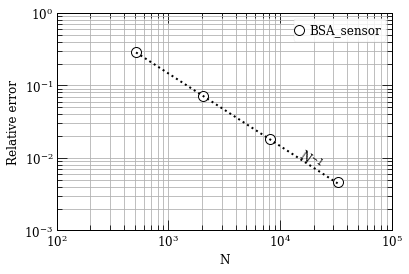

In [7]:

convergence_helper.plot_sph_complex_convergence(
    num_elements, rel_err, file_name='convergence_bsa_sensor_R8_d=1_w=380')

**The line below generates the pdf image as it shows in the paper**

In [8]:
convergence_helper.plot_sph_complex_convergence(
    num_elements, rel_err, file_name='convergence_bsa_sensor_R8_d=1_w=380', paper=True)

### Extra information about simulations. 

**Parameters used for convergence analysis:** 
```
Precision   double
K           4
Nk          9  
K_fine      37
thresold    0.5
BSZ         128
restart     100
tolerance   1e-5
max_iter    1000
P           15
eps         1e-12
NCRIT       500
theta       0.5   
GPU         1
```

## Relaxation of parameters: 
* reduce density of protein form 2 to 1 triangles per Angstrom square 

```
k_fine = 37
P = 6
tol = 1e-3
```

Solve time = 430 s
iterations = 63

Cext per surface

* Surface 0: 1768.4432836448827 nm^2
* Surface 1: 6.297916878775289 nm^2


In [9]:
C_ext_relax_1 = 1768.4433

In [10]:
rel_err_relax_1, perc_err_relax_1 = convergence_helper.perc_error(C_ext_relax_1, rich_ext)
print('percentage error', perc_err_relax_1)

percentage error 0.578086562002


Reducing k_fine from 37 to 19:
```
k_fine = 19
P = 6
tol = 1e-3
```

Solve time = 407
iterations = 64

Cext per surface:
* Surface 0: 1767.1938008494571 nm^2
* Surface 1: 6.2969291092323045 nm^2


In [11]:
C_ext_relax_2 = 1767.1938

In [12]:
rel_err_relax_2, perc_err_relax_2 = convergence_helper.perc_error(C_ext_relax_2, rich_ext)
print('percentage error', perc_err_relax_2)

percentage error 0.648333473984
